### Clustering:
Clustering, falling under the category of unsupervised machine learning, is a one of the problems that machine learning algorithms solve.

- Clustering is the process of grouping similar data points together. The goal of this unsupervised machine learning technique is to find similarities in the data points and group similar data points together.
- Clustering only uses the input data, to determine patterns or similarities in its input data.
<img src='./Image/14.1 Image a.png' width='60%' height='60%'/>


- **Clustering algorithm aims to create clusters whose:**
  - **intra-cluster distance** (Distance between data points within a cluster) is minimum.
  - **inter-cluster distance** (Distance between two clusters) is maximum.
<img src='./Image/14.1 Image b.jpg' width='60%' height='60%'/>

## K-Mean Clustering: 
- This algorithm is used to classify or group objects based on attributes/features into K number of groups. K is positive integer number.
- K-means performs division of objects into clusters which are “similar” to eachother.
<img src='./Image/14.1 Image c.png' width='60%' height='60%'/>

**Eg.** Grouping of documents, music and movies or finding customers those are having similar interest based on common purchase behaviour as a basis for recommendation engines.

- In K-Means clustering, each cluster can either be the centroid of similar points with continuous features or the medoid(most frequently occuring points) in case of categorical features.

- One of the drawbacks of this clustering algorithm is that we have to specify the number of clusters. An inappropriate choice for clusters can result in poor clustering performance.

But there are some techniques (elbow method and silhoutte plots) which are useful to evaluate the quality of a clustering to help us determine the optimal no. of clusters.

### K-Mean Algorithm Workflow:
- Step 1: Choose the number of k clusters.
- Step 2: Select at random k points, the centroids.
- Step 3: Assign each data points to closest centroid.
- Step 4: Compute and place the new centroid of each cluster.
- Step 5: Reassign each data point to the new closest centroid.
If any reassignment took place, go to step 4, otherwise model is ready.
<img src='./Image/14.1 Image d.png' width='40%' height='40%'/>
<img src='./Image/14.1 Image e.png' width='40%' height='40%'/>
<img src='./Image/14.1 Image f.png' width='40%' height='40%'/>
<img src='./Image/14.1 Image g.png' width='40%' height='40%'/>
<img src='./Image/14.1 Image h.png' width='40%' height='40%'/>

### Choosing right no. of cluster:
- Objective function in k-Means measures sum of distances of observations from their cluster centroids, called **Within-Cluster-Sum-of-Squares(WCSS)** which is sometimes also called **clustering inertia**.
<img src='./Image/14.1 Image i.png' width='50%' height='50%'/>
            
- Hence the less the WCSS says or the higher the number of close is the better the goodness of fit i.e, we were fitting our data better and better and better and therefore the lesser the WCSS says the better the goodness of fit is deemed to be.
- But, when WCSS drops not substantially this is hint at selecting the optimum optimal number of clusters and the method we're going to use is the elbow method.
  - i.e, Look for that elbow in your chart where the drop goes from being quite substantial to being not as substantial not as proven is not as great and therefore that point in your chart is going to be the optimal number of clusters.
  
### Summary: 
K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.

The results of the K-means clustering algorithm are:

1) The centroids of the K clusters, which can be used to label new data.

2) Labels for the training data (each data point is assigned to a single cluster).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('14.1Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

**ML Question Formulation:** To segment the clients into different groups based on these two metrics: the annual income and the spending score.

In [4]:
x= data.iloc[:, [3, 4]].values

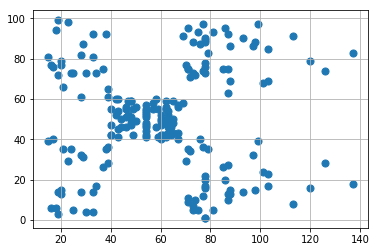

In [5]:
plt.scatter(x[:, 0], x[:, 1], marker= 'o', s=50)
plt.grid()
plt.show()

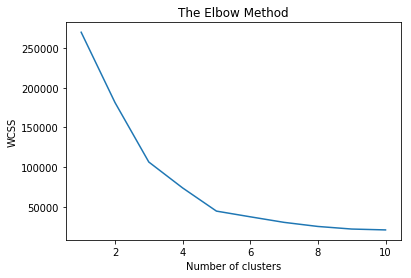

In [6]:
# Using the method to find the optimal number of clusters:
from sklearn.cluster import KMeans
wcss= []
for i in range(1, 11):
    kmeans= KMeans(n_clusters= i, init= 'k-means++', max_iter= 300, n_init= 10, random_state= 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Here we are trying to minimize the within cluster sum of squares to plot our elbow method chart.

In [8]:
pd.DataFrame(wcss, index= range(1, 11))

,0
1,269981.280000
2,181363.595960
3,106348.373062
4,73679.789039
5,44448.455448
6,37265.865205
7,30259.657207
8,25095.703210
9,21830.041978
10,20736.679939


In [9]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter= 300, n_init= 10, random_state= 0)

we set n_init=10 to run the k-means clustering algorithm 10 times independently with different random centroids to choose the final model as the one with lowest SSE(cluster inertia).

max_iter parameter specify maximum number of iterations for each single run.

In [10]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [11]:
y_kmeans = kmeans.predict(x)

In [12]:
kmeans.inertia_

44448.45544793371

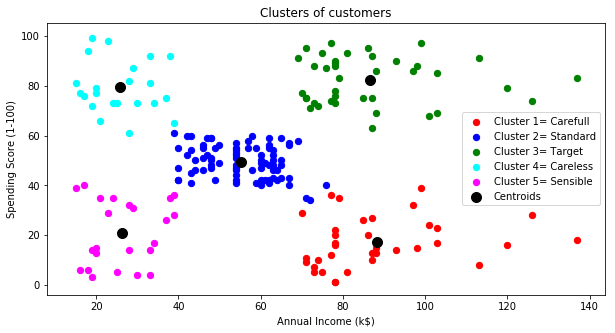

In [13]:
# Visualising the clusters
plt.figure(figsize=(10,5))
plt.scatter(x[y_kmeans== 0, 0], x[y_kmeans== 0, 1], s= 40, c= 'red', label= 'Cluster 1= Carefull')
plt.scatter(x[y_kmeans== 1, 0], x[y_kmeans== 1, 1], s= 40, c= 'blue', label= 'Cluster 2= Standard')
plt.scatter(x[y_kmeans== 2, 0], x[y_kmeans== 2, 1], s= 40, c= 'green', label= 'Cluster 3= Target')
plt.scatter(x[y_kmeans== 3, 0], x[y_kmeans== 3, 1], s= 40, c= 'cyan', label= 'Cluster 4= Careless')
plt.scatter(x[y_kmeans== 4, 0], x[y_kmeans== 4, 1], s= 40, c= 'magenta', label= 'Cluster 5= Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()